In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\itsno\Desktop\Portfolio Projects\portfolio_project_17_v1_Predicting_Sales_skitlearn_python\csv_data\Advertising.csv")

In [3]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


C:\Users\itsno\AppData\Local\Temp\ipykernel_17304\1749397676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sales)


<Axes: xlabel='sales', ylabel='Density'>

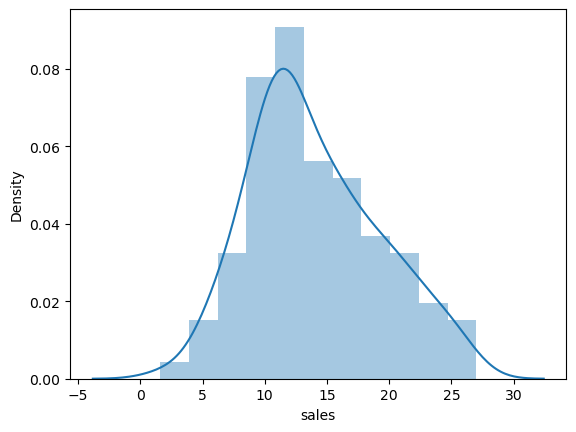

In [11]:
# Advertising on TV and radio seem to be uniformally distributed and higher compared to sales and newspaper advertising 

# Sales and newspaper advertising are skewed 

import seaborn as sns
sns.distplot(df.sales)

C:\Users\itsno\AppData\Local\Temp\ipykernel_17304\3464958114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.newspaper)


<Axes: xlabel='newspaper', ylabel='Density'>

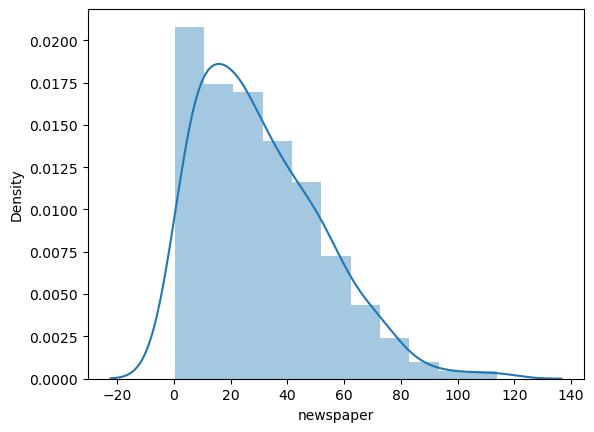

In [14]:
sns.distplot(df.newspaper)

C:\Users\itsno\AppData\Local\Temp\ipykernel_17304\2873433845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.radio)


<Axes: xlabel='radio', ylabel='Density'>

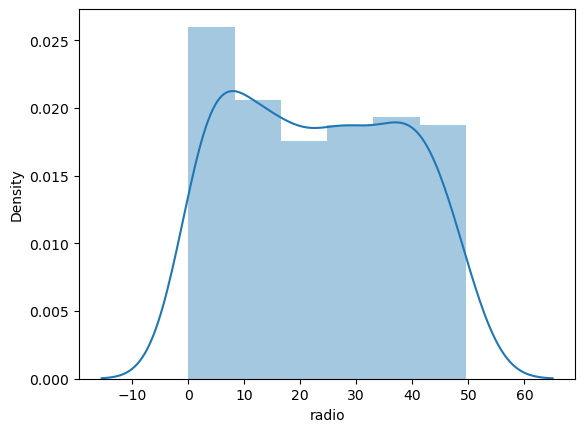

In [13]:
sns.distplot(df.radio)

C:\Users\itsno\AppData\Local\Temp\ipykernel_17304\3796458000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TV)


<Axes: xlabel='TV', ylabel='Density'>

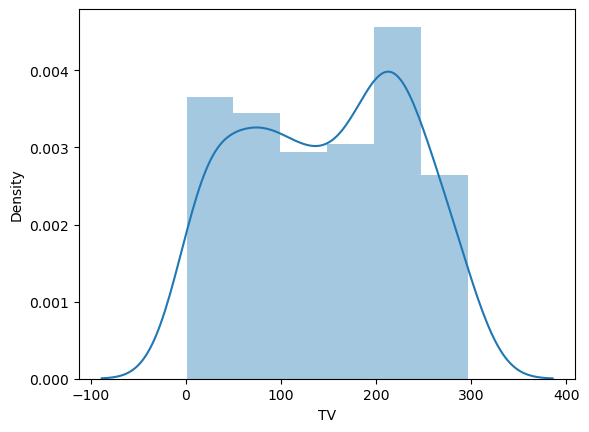

In [15]:
sns.distplot(df.TV)

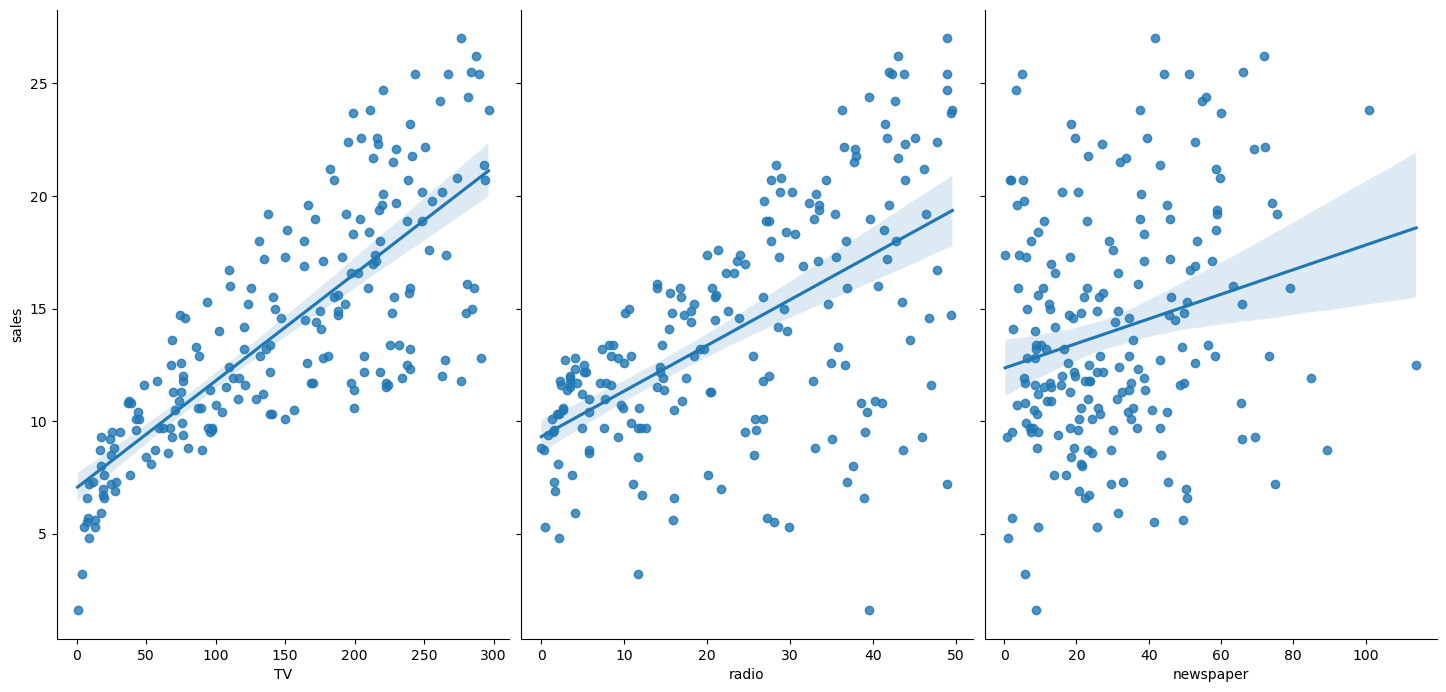

In [18]:
# At a glance:

# There seems to be a strong relationship between TV advertising and sales

# There seems to be a weak relationship between radio advertising and sales 

# There seems to be an extremely weak to no relationship between newspaper advertising and sales


sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [22]:
df.TV.corr(df.sales)

0.7822244248616061

In [24]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

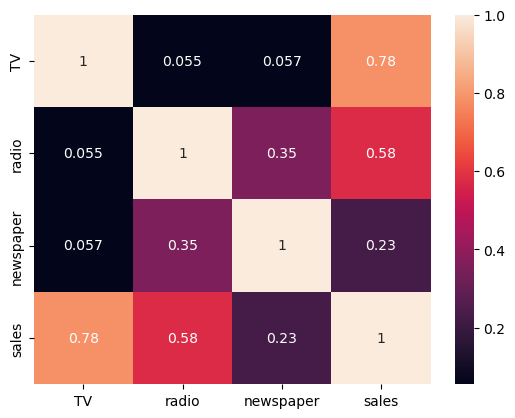

In [26]:
# The TV variable is most highly correlated with sales 

sns.heatmap(df.corr(), annot=True)

**Our Simple Linear Regression Model: y = B0 + B1 x TV + B2 x Radio + B3 x Newspaper**

The model coefficients (B0, B1, B2, and B3) are "learned" during the model fitting steps using the "least squares" criterion

The fitted model is then used to make predictions

In [28]:
X = df[['TV']]

X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [32]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [33]:
y = df.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [36]:
from sklearn.linear_model import LinearRegression 

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
# For a given amount of radio and newspaper ad spending, an additional $1000 spent on TV ads is associated with an increase in sales of 48.8 items 

# This is a statement of association or correlation, NOT causation 

# If an increase in TV ad spending was associated with a decrease in sales, then B1 would be negative (here it is positive)


print(linreg.intercept_)
print(linreg.coef_)


6.91197261886872
[0.04802945]


## **Making Predictions with our Model**

In [39]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

## **Model Evaluation Metrics**

In [40]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]


In [42]:
# Mean Absolute Error 

print((10 + 0 + 20 + 10) / 4)

from sklearn import metrics 
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [43]:
# Mean Squared Error

print((10**2+ 0**2 + 20**2 + 10**2) / 4)

print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [44]:
# Root Mean Squared Error

print(np.sqrt((10**2+ 0**2 + 20**2 + 10**2) / 4))

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589
